In [1]:
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [4]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

## Data Cleaning

### Mssubclass

In [5]:
'''
20: Tek katlı 1946 dan yeni evler
30 Tek katlı 1945 den eski
40 Tek katlı, çatı katı tamamlanmış, her yaştan olabilir
45: 1.5 kat+yarım çatı katı, her yaş
50: 1.5 kat+çatı katı
60: 2 kat 1946 dan yeni
70: 2 kat 1945 den eski
75: 2.5 kat, her yaş
80: 2 veya daha fazla seviyede düşey olarak bölünmüş evler
85: giriş katının iki farklı seviyeye bölündüğünü belirtir
90: duplex
120: Tek kat, 46 dan yeni +PUD
150: 1.5 kat her yaş+PUD
160: 2 kat 46 dan yeni +PUD
180: 2 veya daha fazla seviye+PUD
190: 2 ailelik ve her yaş

120-150-160-180 : PUD
190:2 aile
80-85-90: Multilevel
60-70-75: >2kat
45-50:1.5 kat
20-30-40: 1 kat
'''
df.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [6]:
def MSSubClass_transform(text):
    
    if (text==20 or text==30 or text==40):
        return '1 kat'
    
    elif (text==45 or text==50):
        return '1.5 kat'
    
    elif (text==60 or text==70 or text==75):
        return '2 kat'
    
    elif (text==80 or text==85 or text==90):
        return 'multilevel'
    
    elif text==190:
        return '2 aile'
    
    elif (text==160 or text==120 or text==150 or text==180):
        return 'PUD'
    
    else:
        return 'Other'

In [7]:
df['MSSubClass'] = df['MSSubClass'].apply(lambda x:MSSubClass_transform(x))
df_test['MSSubClass'] = df_test['MSSubClass'].apply(lambda x:MSSubClass_transform(x))

df = pd.get_dummies(df, columns = ["MSSubClass"])
df_test = pd.get_dummies(df_test, columns = ["MSSubClass"])

### Mszoning

In [8]:
'''
RL: Düşük yoğunluklu bölge
RM: Orta yoğunluklu
FV: Su kenarı köy tipi
RH: Yüksek yoğunluk
C: Ticari mülk vs
'''
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [9]:
df_test["MSZoning"].fillna(df.MSZoning.mode()[0], inplace=True)

In [10]:
def MSZoning_transform(text):
    
    if text=='RL' :
        return 1
    
    elif text=='FV':
        return 0
    
    elif text=='RM':
        return 2
    
    elif text=='RH':
        return 3
    
   
    
    else:
        return 4

In [11]:
df['MSZoning'] = df['MSZoning'].apply(lambda x:MSZoning_transform(x))
df_test['MSZoning'] = df_test['MSZoning'].apply(lambda x:MSZoning_transform(x))

In [12]:
df.drop(columns='Id', inplace=True)

### LotFrontage

In [13]:
df["LotFrontage"].fillna(df.LotFrontage.mean(), inplace=True)
df_test["LotFrontage"].fillna(df.LotFrontage.mean(), inplace=True)

In [14]:
scaler = preprocessing.MinMaxScaler()
scaler_s = preprocessing.StandardScaler()

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

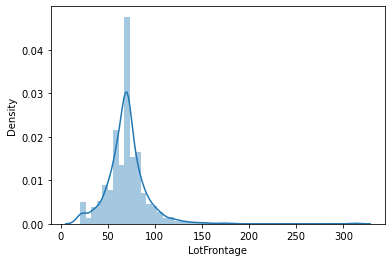

In [15]:
sns.distplot(df.LotFrontage)

In [16]:
from scipy import stats


# Örnek verileri oluşturma


# Box-Cox dönüşümü

data, param = stats.boxcox(np.log(df.LotFrontage))
data2, param = stats.boxcox(np.log(df_test.LotFrontage))

print("Box-Cox dönüşümü sonrası:")
print("Ortalama değer:", data.mean())
print("Standart sapma:", data.std())


from scipy.stats import shapiro



# Shapiro-Wilk normalite testini yap
stat, p = shapiro(scaler.fit_transform(data.reshape(-1,1)))
print("SHAPIRO:\n")
print('Test İstatistiği=%.3f, p-değeri=%.3f' % (stat, p))

# p-değeri 0.05'ten küçükse, normal dağılımdan sapma olduğunu söyleyebiliriz
if p > 0.05:
    print('Dizi normal dağılıyor')
else:
    print('Dizi normal dağılmıyor')
    
    


Box-Cox dönüşümü sonrası:
Ortalama değer: 24.665287546078194
Standart sapma: 5.369631535702976
SHAPIRO:

Test İstatistiği=0.926, p-değeri=0.000
Dizi normal dağılmıyor


In [17]:
df['LotFrontage'] = scaler.fit_transform(data.reshape(-1,1))
df_test['LotFrontage'] = scaler.fit_transform(data2.reshape(-1,1))

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

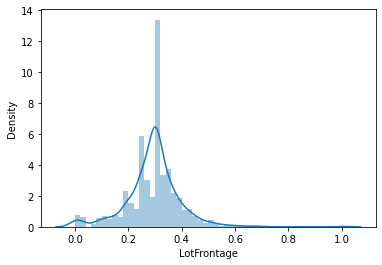

In [18]:
sns.distplot(df.LotFrontage)

### LotArea

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

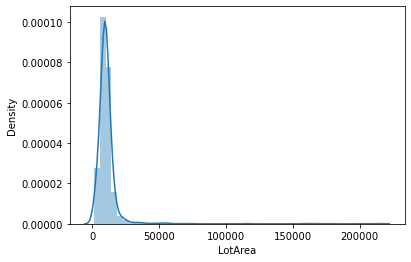

In [19]:
sns.distplot(df.LotArea)

In [20]:
from scipy import stats


# Örnek verileri oluşturma


# Box-Cox dönüşümü
data, param = stats.boxcox(df.LotArea)
data2, param = stats.boxcox(df_test.LotArea)

print("Box-Cox dönüşümü sonrası:")
print("Ortalama değer:", data.mean())
print("Standart sapma:", data.std())


from scipy.stats import shapiro



# Shapiro-Wilk normalite testini yap
stat, p = shapiro(scaler.fit_transform(data.reshape(-1,1)))
print("\nSHAPIRO:\n")
print('Test İstatistiği=%.3f, p-değeri=%.3f' % (stat, p))

# p-değeri 0.05'ten küçükse, normal dağılımdan sapma olduğunu söyleyebiliriz
if p > 0.05:
    print('Dizi normal dağılıyor')
else:
    print('Dizi normal dağılmıyor')
    
    


Box-Cox dönüşümü sonrası:
Ortalama değer: 10.530430915249726
Standart sapma: 0.6853697015605438

SHAPIRO:

Test İstatistiği=0.905, p-değeri=0.000
Dizi normal dağılmıyor


C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

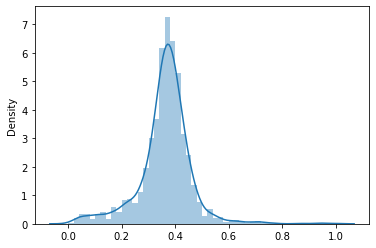

In [21]:
sns.distplot(scaler.fit_transform(data.reshape(-1,1)))

In [22]:
df["LotArea"]=scaler.fit_transform(data.reshape(-1,1))
df_test["LotArea"]=scaler.fit_transform(data2.reshape(-1,1))

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

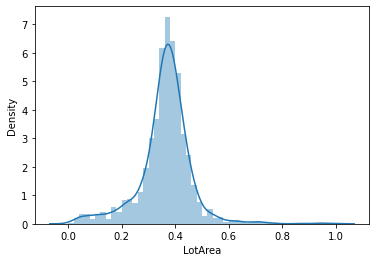

In [23]:
sns.distplot(df.LotArea)

### Street

In [24]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [25]:
df.groupby("Street").mean()

,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1 kat,MSSubClass_1.5 kat,MSSubClass_2 aile,MSSubClass_2 kat,MSSubClass_PUD,MSSubClass_multilevel
Street,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Grvl,2.166667,0.350418,0.530135,4.833333,4.833333,1961.333333,1963.833333,55.000000,554.666667,143.166667,325.000000,1022.833333,1126.833333,27.833333,0.000000,1154.666667,0.833333,0.000000,1.166667,0.166667,2.50000,1.000000,5.333333,0.666667,1967.400000,2.000000,632.000000,129.333333,52.500000,0.000000,0.000000,43.833333,0.000000,219.000000,6.166667,2008.333333,130190.500000,0.500000,0.00000,0.166667,0.000000,0.000000,0.333333
Pave,1.143054,0.292344,0.361436,6.104539,5.578404,1971.308803,1984.952545,103.887275,443.181568,46.150619,568.240028,1057.572215,1162.774415,348.309491,5.868638,1516.952545,0.423659,0.057772,1.566713,0.383769,2.86795,1.046768,6.522696,0.612792,1978.546579,1.766162,472.323934,94.099725,46.636176,22.044704,3.423659,14.942228,2.770289,42.764787,6.322558,2007.813618,181130.538514,0.416781,0.10729,0.019945,0.257909,0.110041,0.088033


In [26]:
df = pd.get_dummies(df, columns = ["Street"])
df_test = pd.get_dummies(df_test, columns = ["Street"])

### Alley

In [27]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [28]:
df["Alley"].fillna('have not', inplace=True)
df_test["Alley"].fillna('have not', inplace=True)

In [29]:
df = pd.get_dummies(df, columns = ["Alley"])
df_test = pd.get_dummies(df_test, columns = ["Alley"])

### Lotshape

In [30]:
df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [31]:
mapping = {'IR1': 'IR', 'IR2': 'IR', 'IR3': 'IR'}

# replace() metodunu kullanarak değişikliği uyguluyoruz
df['LotShape'] = df['LotShape'].replace(mapping)
df_test['LotShape'] = df_test['LotShape'].replace(mapping)

In [32]:
df = pd.get_dummies(df, columns = ["LotShape"])
df_test = pd.get_dummies(df_test, columns = ["LotShape"])

### Landcontour

In [33]:
df.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [34]:
mapping_landcontour = {'Low': 0, 'Lvl': 1, 'Bnk': 2, 'HLS':3}

# replace() metodunu kullanarak değişikliği uyguluyoruz
df['LandContour'] = df['LandContour'].replace(mapping_landcontour)
df_test['LandContour'] = df_test['LandContour'].replace(mapping_landcontour)

### Utilities

In [35]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [36]:
df.groupby("Utilities").mean()

,MSZoning,LotFrontage,LotArea,LandContour,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1 kat,MSSubClass_1.5 kat,MSSubClass_2 aile,MSSubClass_2 kat,MSSubClass_PUD,MSSubClass_multilevel,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_have not,LotShape_IR,LotShape_Reg
Utilities,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AllPub,1.147361,0.292577,0.362069,1.087046,6.099383,5.575051,1971.276902,1984.884167,103.383873,443.867718,46.338588,567.386566,1057.592872,1162.502399,347.230295,5.848526,1515.58122,0.425634,0.056888,1.565456,0.383139,2.866347,1.046607,6.517478,0.612748,1978.521045,1.766964,472.944483,94.309116,46.611378,21.969157,3.411926,14.911583,2.760795,43.518849,6.325565,2007.814942,180950.95682,0.416724,0.106923,0.020562,0.257025,0.109664,0.089102,0.004112,0.995888,0.03427,0.028101,0.937629,0.366004,0.633996
NoSeWa,1.000000,0.300638,0.450679,1.000000,6.000000,6.000000,1958.000000,1958.000000,541.000000,111.000000,354.000000,354.000000,819.000000,1344.000000,0.000000,0.000000,1344.00000,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,7.000000,1.000000,1958.000000,2.000000,525.000000,0.000000,118.000000,0.000000,0.000000,233.000000,0.000000,0.000000,1.000000,2009.000000,137500.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,0.000000


In [37]:
df.drop(columns='Utilities', inplace=True)
df_test.drop(columns='Utilities', inplace=True)

### LotConfig

In [38]:
df.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [39]:
mapping_lotconfig= {'Corner': 'Other', 'FR2': 'Other', 'FR3': 'Other'}

# replace() metodunu kullanarak değişikliği uyguluyoruz
df['LotConfig'] = df['LotConfig'].replace(mapping_lotconfig)
df_test['LotConfig'] = df_test['LotConfig'].replace(mapping_lotconfig)

In [40]:
df = pd.get_dummies(df, columns = ["LotConfig"])
df_test = pd.get_dummies(df_test, columns = ["LotConfig"])

### Landslope

In [41]:
df.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [42]:
def Landslope_transform(text):
    
    if text=='Gtl':
        return 0
    
    elif text=='Mod':
        return 1
    
    else:
        return 2

In [43]:
df['LandSlope'] = df['LandSlope'].apply(lambda x:Landslope_transform(x))
df_test['LandSlope'] = df_test['LandSlope'].apply(lambda x:Landslope_transform(x))

### Neighborhood

In [44]:
def neighborhood_transform(text):
    
    if text=='Mitchel':
        return 'BrkSide'
    
    elif text=='NoRidge':
        return 'Crawfor'
    
    elif text=='Timber' or text=='StoneBr' or text=='Blmngtn':
        return 'Somerst'
    
    elif text=='BrDale' or text=='MeadowV':
        return 'IDOTRR'
    
    elif text=='NPkVill' or text=='Blueste':
        return 'Veenker'
    
df['Neighborhood'] = df['Neighborhood'].apply(lambda x:neighborhood_transform(x))
df_test['Neighborhood'] = df_test['Neighborhood'].apply(lambda x:neighborhood_transform(x))

In [45]:
df.Neighborhood.value_counts()

Somerst    80
BrkSide    49
Crawfor    41
IDOTRR     33
Veenker    11
Name: Neighborhood, dtype: int64

In [46]:
df = pd.get_dummies(df, columns = ["Neighborhood"])
df_test = pd.get_dummies(df_test, columns = ["Neighborhood"])

### Condition 1-2

In [47]:
df.drop(columns=['Condition1','Condition2'], inplace=True)
df_test.drop(columns=['Condition1','Condition2'], inplace=True)

### BldgType

In [48]:
df.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [49]:
df = pd.get_dummies(df, columns = ["BldgType"])
df_test = pd.get_dummies(df_test, columns = ["BldgType"])

### HouseStyle

In [50]:
df.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [51]:
mapping_housestyle= {'SFoyer': 'SLvl','2.5Fin':'2.5Unf'}


df['HouseStyle'] = df['HouseStyle'].replace(mapping_housestyle)
df_test['HouseStyle'] = df_test['HouseStyle'].replace(mapping_housestyle)

In [52]:
df = pd.get_dummies(df, columns = ["HouseStyle"])
df_test = pd.get_dummies(df_test, columns = ["HouseStyle"])

### OverallQual-OverallCond

In [53]:
df.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [54]:
df.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

### Age

In [55]:
df["Age"]=df.YrSold-df.YearBuilt
df_test["Age"]=df_test.YrSold-df_test.YearBuilt

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

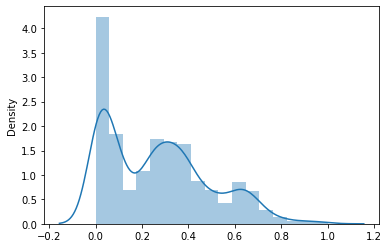

In [56]:
sns.distplot(preprocessing.minmax_scale(df.Age))

In [57]:
df["Age"]=preprocessing.minmax_scale(df.Age)
df_test["Age"]=preprocessing.minmax_scale(df_test.Age)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

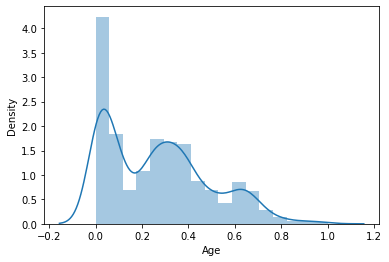

In [58]:
sns.distplot(df.Age)

### YearRemodAdd

In [59]:
df["Age2"]=df.YrSold-df.YearRemodAdd
df_test["Age2"]=df_test.YrSold-df_test.YearRemodAdd

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age2', ylabel='Density'>

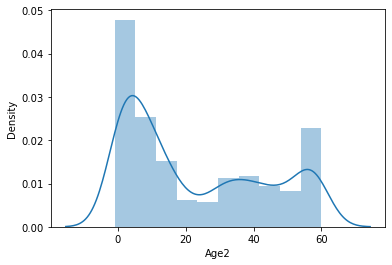

In [60]:
sns.distplot(df.Age2)

In [61]:
df["Age2"]=preprocessing.minmax_scale(df.Age2)
df_test["Age2"]=preprocessing.minmax_scale(df_test.Age2)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age2', ylabel='Density'>

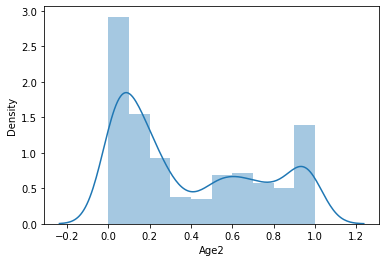

In [62]:
sns.distplot(df.Age2)

In [63]:
df.drop(columns=['YearRemodAdd','YearBuilt','YrSold','MoSold'], inplace=True)
df_test.drop(columns=['YearRemodAdd','YearBuilt','YrSold','MoSold'], inplace=True)

### RoofStyle

In [64]:
df.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [65]:
def roofstyle_transform(text):
    
    if text=='Gable':
        return 'Gable'
    
    elif text=='Hip':
        return 'Hip'
    
    else:
        return 'Other'

In [66]:
df['RoofStyle'] = df['RoofStyle'].apply(lambda x:roofstyle_transform(x))
df_test['RoofStyle'] = df_test['RoofStyle'].apply(lambda x:roofstyle_transform(x))

df = pd.get_dummies(df, columns = ["RoofStyle"])
df_test = pd.get_dummies(df_test, columns = ["RoofStyle"])

### RoofMatl

In [67]:
df.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [68]:
mapping_roofmatl= {'Tar&Grv': 'Other', 'WdShngl': 'Other','WdShake': 'Other','Metal': 'Other','Membran': 'Other','Roll': 'Other',
                   'ClyTile': 'Other'}


df['RoofMatl'] = df['RoofMatl'].replace(mapping_roofmatl)
df_test['RoofMatl'] = df_test['RoofMatl'].replace(mapping_roofmatl)

In [69]:
df = pd.get_dummies(df, columns = ["RoofMatl"])
df_test = pd.get_dummies(df_test, columns = ["RoofMatl"])

### Exterior1-2st

In [70]:
df.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [71]:
df.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [72]:
df_test["Exterior1st"].fillna(df.Exterior1st.mode()[0], inplace=True)
df_test["Exterior2nd"].fillna(df.Exterior2nd.mode()[0], inplace=True)

In [73]:
mapping_Exterior= {'WdShing': 'Plywood', 'Stucco': 'CemntBd','AsbShng': 'CemntBd','Brk Cmn': 'MetalSd','BrkComm': 'MetalSd','Stone': 'MetalSd',
                   'AsphShn': 'CemntBd', 'BrkFace': 'MetalSd',
                   'ImStucc': 'CemntBd', 'CBlock': 'MetalSd','Other': 'VinylSd'}


df['Exterior1st'] = df['Exterior1st'].replace(mapping_Exterior)
df_test['Exterior1st'] = df_test['Exterior1st'].replace(mapping_Exterior)

df['Exterior2nd'] = df['Exterior2nd'].replace(mapping_Exterior)
df_test['Exterior2nd'] = df_test['Exterior2nd'].replace(mapping_Exterior)

In [74]:
df = pd.get_dummies(df, columns = ["Exterior1st"])
df_test = pd.get_dummies(df_test, columns = ["Exterior1st"])

df = pd.get_dummies(df, columns = ["Exterior2nd"])
df_test = pd.get_dummies(df_test, columns = ["Exterior2nd"])

### MasVnrType

In [75]:
df["MasVnrType"].fillna(df.MasVnrType.mode()[0], inplace=True)

df_test["MasVnrType"].fillna(df.MasVnrType.mode()[0], inplace=True)

In [76]:
df.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [77]:
mapping_mastype= {'BrkCmn': 'BrkFace'}



df['MasVnrType'] = df['MasVnrType'].replace(mapping_mastype)
df_test['MasVnrType'] = df_test['MasVnrType'].replace(mapping_mastype)

In [78]:
df = pd.get_dummies(df, columns = ["MasVnrType"])
df_test = pd.get_dummies(df_test, columns = ["MasVnrType"])

### MasvnrArea

In [79]:
df["MasVnrArea"].fillna(df.MasVnrArea.mean(), inplace=True)

df_test["MasVnrArea"].fillna(df.MasVnrArea.mean(), inplace=True)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

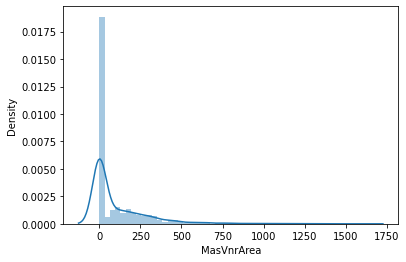

In [80]:
sns.distplot(df.MasVnrArea)

In [81]:

segments = [(0, 1), (1, 250), (250, 500), (500, 750), (750, np.inf)]
values = [0, 1, 2, 3, 4]


value_dict = {i: val for i, val in zip(segments, values)}


df['MasVnrArea'] = pd.cut(df['MasVnrArea'], bins=[s for s, e in segments] + [np.inf], labels=False, right=False)
df['MasVnrArea'] = df['MasVnrArea'].apply(lambda x: value_dict[segments[x]])


df['MasVnrArea'] = df['MasVnrArea'].astype(int)

In [82]:
df.MasVnrArea.value_counts()

0    861
1    364
2    177
3     37
4     21
Name: MasVnrArea, dtype: int64

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

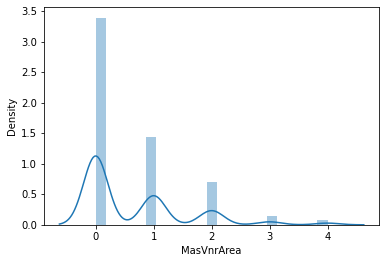

In [83]:
sns.distplot(df.MasVnrArea)

### ExterQual-Cond

In [84]:
df.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [85]:
def exter_transform(text):
    
    if text=='Ex':
        return 4
    
    elif text=='Gd':
        return 3
    
    if text=='TA':
        return 2
    
    elif text=='Fa':
        return 1
    
    else:
        return 0
    
df['ExterQual'] = df['ExterQual'].apply(lambda x:exter_transform(x))
df_test['ExterQual'] = df_test['ExterQual'].apply(lambda x:exter_transform(x))

df['ExterCond'] = df['ExterCond'].apply(lambda x:exter_transform(x))
df_test['ExterCond'] = df_test['ExterCond'].apply(lambda x:exter_transform(x))

### Foundation

In [86]:
df.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [87]:
mapping_f= {'Stone': 'Slab','Wood': 'Slab'}


df['Foundation'] = df['Foundation'].replace(mapping_f)
df_test['Foundation'] = df_test['Foundation'].replace(mapping_f)


In [88]:
df = pd.get_dummies(df, columns = ["Foundation"])
df_test = pd.get_dummies(df_test, columns = ["Foundation"])

### BsmtQual-Cond

In [89]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [90]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [91]:
df["BsmtQual"].fillna(df.BsmtQual.mode()[0], inplace=True)

df_test["BsmtQual"].fillna(df.BsmtQual.mode()[0], inplace=True)

df["BsmtCond"].fillna(df.BsmtCond.mode()[0], inplace=True)

df_test["BsmtCond"].fillna(df.BsmtCond.mode()[0], inplace=True)

In [92]:
def bsmt_transform(text):
    
    if text=='Ex':
        return 5
    
    elif text=='Gd':
        return 4
    
    if text=='TA':
        return 3
    
    elif text=='Fa':
        return 2
    
    elif text=='Po':
        return 1
    
    else:
        return 0

In [93]:
df['BsmtQual'] = df['BsmtQual'].apply(lambda x:bsmt_transform(x))
df_test['BsmtQual'] = df_test['BsmtQual'].apply(lambda x:bsmt_transform(x))

df['BsmtCond'] = df['BsmtCond'].apply(lambda x:bsmt_transform(x))
df_test['BsmtCond'] = df_test['BsmtCond'].apply(lambda x:bsmt_transform(x))

### BsmtExposure

In [94]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [95]:
df["BsmtExposure"].fillna(df.BsmtExposure.mode()[0], inplace=True)

df_test["BsmtExposure"].fillna(df.BsmtExposure.mode()[0], inplace=True)

In [96]:
def bsmtex_transform(text):
    
    if text=='Gd':
        return 4
    
    elif text=='Av':
        return 3
    
    if text=='Mn':
        return 2
    
    elif text=='No':
        return 1
    
    elif text=='NA':
        return 0

In [97]:
df['BsmtExposure'] = df['BsmtExposure'].apply(lambda x:bsmtex_transform(x))
df_test['BsmtExposure'] = df_test['BsmtExposure'].apply(lambda x:bsmtex_transform(x))

### FinType

In [98]:
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [99]:
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [100]:
df["BsmtFinType1"].fillna(df.BsmtFinType1.mode()[0], inplace=True)

df_test["BsmtFinType1"].fillna(df.BsmtFinType1.mode()[0], inplace=True)

df["BsmtFinType2"].fillna(df.BsmtFinType2.mode()[0], inplace=True)

df_test["BsmtFinType2"].fillna(df.BsmtFinType2.mode()[0], inplace=True)

In [101]:
def fintype_transform(text):
    
    if text=='GLQ':
        return 6
    
    elif text=='ALQ':
        return 5
    
    if text=='BLQ':
        return 4
    
    elif text=='Rec':
        return 3
    
    elif text=='LwQ':
        return 2
    
    elif text=='Unf':
        return 1
    
    elif text=='NA':
        return 0

In [102]:
df['BsmtFinType1'] = df['BsmtFinType1'].apply(lambda x:fintype_transform(x))
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].apply(lambda x:fintype_transform(x))

df['BsmtFinType2'] = df['BsmtFinType2'].apply(lambda x:fintype_transform(x))
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].apply(lambda x:fintype_transform(x))

### FinSF

In [103]:
df_test["BsmtFinSF1"].fillna(df.BsmtFinSF1.mean(), inplace=True)

df_test["BsmtFinSF2"].fillna(df.BsmtFinSF2.mean(), inplace=True)

In [104]:
df["BsmtFinSF1"] = np.where(df["BsmtFinSF1"]==0, 1, df["BsmtFinSF1"])
df["BsmtFinSF2"] = np.where(df["BsmtFinSF2"]==0, 1, df["BsmtFinSF2"])

df_test["BsmtFinSF1"] = np.where(df_test["BsmtFinSF1"]==0, 1, df_test["BsmtFinSF1"])
df_test["BsmtFinSF2"] = np.where(df_test["BsmtFinSF2"]==0, 1, df_test["BsmtFinSF2"])

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

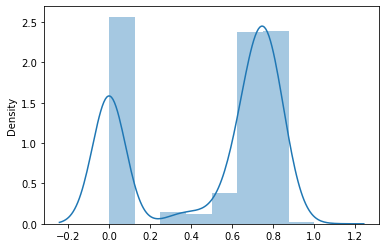

In [105]:
sns.distplot(scaler.fit_transform(np.log(df.BsmtFinSF1.values.reshape(-1,1))))

In [106]:
df["BsmtFinSF1"]=scaler.fit_transform(np.log(df.BsmtFinSF1.values.reshape(-1,1)))
df_test["BsmtFinSF1"]=scaler.fit_transform(np.log(df_test.BsmtFinSF1.values.reshape(-1,1)))

In [107]:
df["BsmtFinSF2"]=scaler.fit_transform(np.log(df.BsmtFinSF2.values.reshape(-1,1)))
df_test["BsmtFinSF2"]=scaler.fit_transform(np.log(df_test.BsmtFinSF2.values.reshape(-1,1)))

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

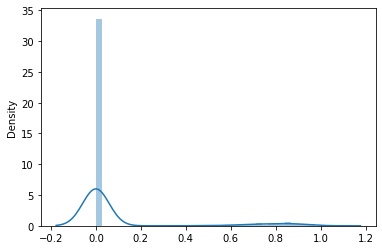

In [108]:
sns.distplot(scaler.fit_transform(df.BsmtFinSF2.values.reshape(-1,1)))

### UnfSF

In [109]:
df_test["BsmtUnfSF"].fillna(df.BsmtUnfSF.mean(), inplace=True)

In [110]:
df["BsmtUnfSF"] = np.where(df["BsmtUnfSF"]==0, 1, df["BsmtUnfSF"])
df_test["BsmtUnfSF"] = np.where(df_test["BsmtUnfSF"]==0, 1, df_test["BsmtUnfSF"])

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

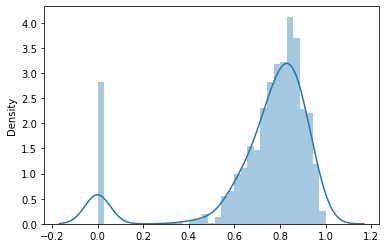

In [111]:
sns.distplot(scaler.fit_transform(np.log(df.BsmtUnfSF.values.reshape(-1,1))))

In [112]:
df["BsmtUnfSF"] = scaler.fit_transform(np.log(df.BsmtUnfSF.values.reshape(-1,1)))
df_test["BsmtUnfSF"] = scaler.fit_transform(np.log(df_test.BsmtUnfSF.values.reshape(-1,1)))

### TotalBsmtsf

In [113]:
df_test["TotalBsmtSF"].fillna(df.TotalBsmtSF.mean(), inplace=True)

In [114]:
df["TotalBsmtSF"] = np.where(df["TotalBsmtSF"]==0, 1, df["TotalBsmtSF"])
df_test["TotalBsmtSF"] = np.where(df_test["TotalBsmtSF"]==0, 1, df_test["TotalBsmtSF"])

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

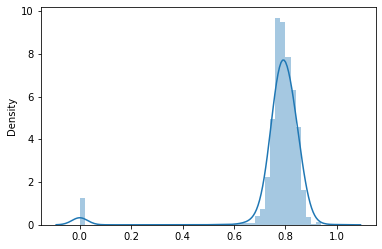

In [115]:
sns.distplot(scaler.fit_transform(np.log(df.TotalBsmtSF.values.reshape(-1,1))))

In [116]:
df["TotalBsmtSF"] = scaler.fit_transform(np.log(df.TotalBsmtSF.values.reshape(-1,1)))

In [117]:
df_test["TotalBsmtSF"] = scaler.fit_transform(np.log(df_test.TotalBsmtSF.values.reshape(-1,1)))

### Heating

In [118]:
df.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [119]:
mapping_heating= {'Grav': 'Other','Wall': 'Other','OthW': 'Other','Floor': 'Other'}


df['Heating'] = df['Heating'].replace(mapping_heating)
df_test['Heating'] = df_test['Heating'].replace(mapping_heating)

df = pd.get_dummies(df, columns = ["Heating"])
df_test = pd.get_dummies(df_test, columns = ["Heating"])


In [120]:
df.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [121]:
def HeatingQC_transform(text):

    
    if text=='Ex':
        return 4
    
    elif text=='Gd':
        return 3
    
    elif text=='TA':
        return 2
    
    elif text=='Fa':
        return 1
    
    elif text=='Po':
        return 0
    
df['HeatingQC'] = df['HeatingQC'].apply(lambda x:HeatingQC_transform(x))
df_test['HeatingQC'] = df_test['HeatingQC'].apply(lambda x:HeatingQC_transform(x))

### Central Air

In [122]:
df.CentralAir

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: CentralAir, Length: 1460, dtype: object

In [123]:
df['CentralAir'] = df['CentralAir'].replace({'N': 0, 'Y': 1})
df_test['CentralAir'] = df_test['CentralAir'].replace({'N': 0, 'Y': 1})

In [124]:
df['CentralAir'] = df['CentralAir'].astype(int)
df_test['CentralAir'] = df_test['CentralAir'].astype(int)

### Electrical

In [125]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [126]:
mapping_elec= {'FuseP': 'SBrkr','Mix': 'SBrkr'}


df['Electrical'] = df['Electrical'].replace(mapping_elec)
df_test['Electrical'] = df_test['Electrical'].replace(mapping_elec)

df = pd.get_dummies(df, columns = ["Electrical"])
df_test = pd.get_dummies(df_test, columns = ["Electrical"])

### FlrSf

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

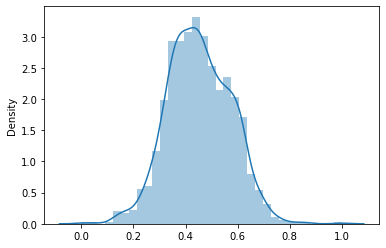

In [127]:
sns.distplot(preprocessing.minmax_scale(np.log(df["1stFlrSF"])))

In [128]:
df["1stFlrSF"]=preprocessing.minmax_scale(np.log(df["1stFlrSF"]))
df_test["1stFlrSF"]=preprocessing.minmax_scale(np.log(df_test["1stFlrSF"]))

In [129]:
df["2ndFlrSF"] = np.where(df["2ndFlrSF"]==0, 1, df["2ndFlrSF"])
df_test["2ndFlrSF"] = np.where(df_test["2ndFlrSF"]==0, 1, df_test["2ndFlrSF"])

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

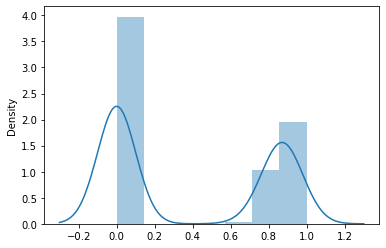

In [130]:
sns.distplot(preprocessing.minmax_scale(np.log(df["2ndFlrSF"])))

In [131]:
df["2ndFlrSF"]=preprocessing.minmax_scale(np.log(df["2ndFlrSF"]))
df_test["2ndFlrSF"]=preprocessing.minmax_scale(np.log(df_test["2ndFlrSF"]))

### LowQualfinsf

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

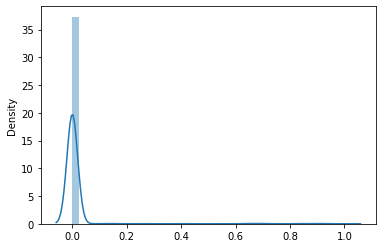

In [132]:
sns.distplot(preprocessing.minmax_scale(df.LowQualFinSF))

In [133]:
df.LowQualFinSF.value_counts()

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64

In [134]:
df.drop(columns='LowQualFinSF', inplace=True)
df_test.drop(columns='LowQualFinSF', inplace=True)

### GrlivArea

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

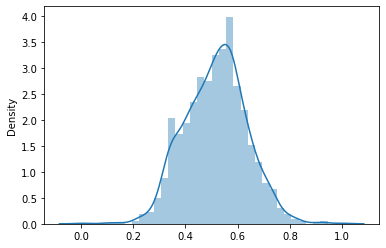

In [135]:
sns.distplot(preprocessing.minmax_scale(np.log(df.GrLivArea)))

In [136]:
df["GrLivArea"]=preprocessing.minmax_scale(np.log(df.GrLivArea))
df_test["GrLivArea"]=preprocessing.minmax_scale(np.log(df_test.GrLivArea))

### Bath

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HalfBath', ylabel='Density'>

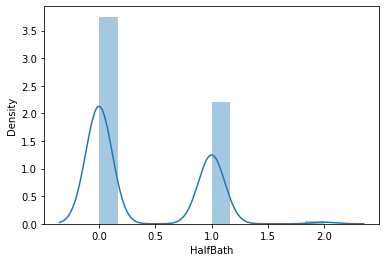

In [137]:
sns.distplot(df.HalfBath)

In [138]:
df_test["BsmtHalfBath"].fillna(df.BsmtHalfBath.mode()[0], inplace=True)
df_test["BsmtFullBath"].fillna(df.BsmtFullBath.mode()[0], inplace=True)

### Bedroom

In [139]:
df.BedroomAbvGr.unique()

array([3, 4, 1, 2, 0, 5, 6, 8], dtype=int64)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BedroomAbvGr', ylabel='Density'>

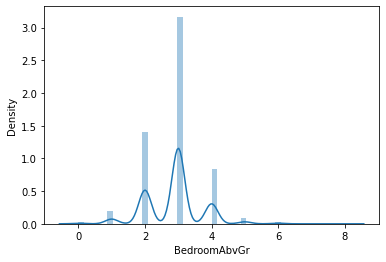

In [140]:
sns.distplot(df.BedroomAbvGr)

In [141]:
df["BedroomAbvGr"]=preprocessing.minmax_scale(df.BedroomAbvGr)

### Kitchen

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

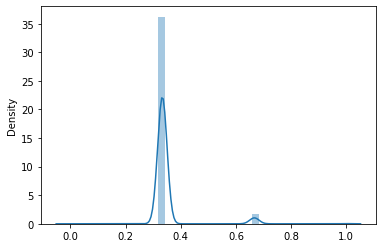

In [142]:
sns.distplot(preprocessing.minmax_scale(df.KitchenAbvGr))

In [143]:
df["KitchenAbvGr"]=preprocessing.minmax_scale(df.KitchenAbvGr)

In [144]:
df_test["KitchenQual"].fillna(df_test.KitchenQual.mode()[0], inplace=True)

In [145]:
df.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [146]:
def kitchen_transform(text):

    
    if text=='Ex':
        return 4
    
    elif text=='Gd':
        return 3
    
    elif text=='TA':
        return 2
    
    elif text=='Fa':
        return 1
    
    elif text=='Po':
        return 0
    
df['KitchenQual'] = df['KitchenQual'].apply(lambda x:kitchen_transform(x))
df_test['KitchenQual'] = df_test['KitchenQual'].apply(lambda x:kitchen_transform(x))

### Totrooms

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

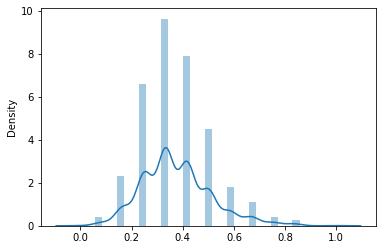

In [147]:
sns.distplot(preprocessing.minmax_scale(df.TotRmsAbvGrd))

In [148]:
df["TotRmsAbvGrd"]=preprocessing.minmax_scale(df.TotRmsAbvGrd)

### Functional

In [149]:
df_test["Functional"].fillna(df_test.Functional.mode()[0], inplace=True)

In [150]:
df.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [151]:
mapping_func = {'Min1': 'Min2', 'Mod': 'Maj1', 'Maj2': 'Maj1', 'Sev':'Maj1'}

# replace() metodunu kullanarak değişikliği uyguluyoruz
df['Functional'] = df['Functional'].replace(mapping_func)
df_test['Functional'] = df_test['Functional'].replace(mapping_func)

In [152]:
df = pd.get_dummies(df, columns = ["Functional"])
df_test = pd.get_dummies(df_test, columns = ["Functional"])

### Fireplace

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fireplaces', ylabel='Density'>

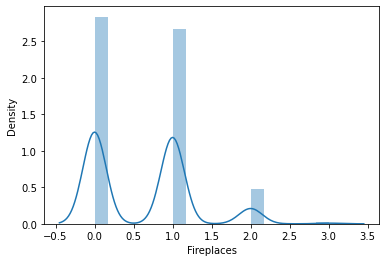

In [153]:
sns.distplot(df.Fireplaces)

In [154]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('Po')

In [155]:
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('Po')

In [156]:
df.FireplaceQu.value_counts()

Po    710
Gd    380
TA    313
Fa     33
Ex     24
Name: FireplaceQu, dtype: int64

In [157]:
def fire_transform(text):
    
    if text=='Ex':
        return 4
    
    elif text=='Gd':
        return 3
    
    if text=='TA':
        return 2
    
    elif text=='Fa':
        return 1
    
    else:
        return 0
    
df['FireplaceQu'] = df['FireplaceQu'].apply(lambda x:fire_transform(x))
df_test['FireplaceQu'] = df_test['FireplaceQu'].apply(lambda x:fire_transform(x))

### Garage

In [158]:
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [159]:
mapping_gtype = {'2Types': 'Attchd', 'Basment': 'BuiltIn', 'CarPort': 'Detchd'}

df['GarageType'] = df['GarageType'].replace(mapping_gtype)
df_test['GarageType'] = df_test['GarageType'].replace(mapping_gtype)

df = pd.get_dummies(df, columns = ["GarageType"])
df_test = pd.get_dummies(df_test, columns = ["GarageType"])

In [160]:
df["GarageYrBlt"].fillna(df.GarageYrBlt.mean(), inplace=True)
df_test["GarageYrBlt"].fillna(df.GarageYrBlt.mean(), inplace=True)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

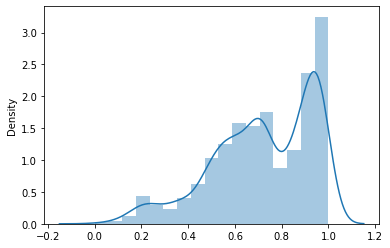

In [161]:
sns.distplot(preprocessing.minmax_scale(np.log(df.GarageYrBlt)))

In [162]:
df["GarageYrBlt"]=preprocessing.minmax_scale(np.log(df.GarageYrBlt))
df_test["GarageYrBlt"]=preprocessing.minmax_scale(np.log(df_test.GarageYrBlt))

In [163]:
df["GarageFinish"].fillna(df.GarageFinish.mode()[0], inplace=True)
df_test["GarageFinish"].fillna(df_test.GarageFinish.mode()[0], inplace=True)

In [164]:
df.GarageFinish.value_counts()

Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [165]:
df = pd.get_dummies(df, columns = ["GarageFinish"])
df_test = pd.get_dummies(df_test, columns = ["GarageFinish"])

In [166]:
df_test["GarageCars"].fillna(df_test.GarageCars.mode()[0], inplace=True)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GarageCars', ylabel='Density'>

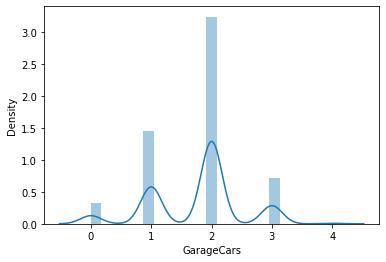

In [167]:
sns.distplot(df.GarageCars)

In [168]:
df["GarageCars"]=preprocessing.minmax_scale(df.GarageCars)
df_test["GarageCars"]=preprocessing.minmax_scale(df_test.GarageCars)

In [169]:
df_test["GarageArea"].fillna(df_test.GarageArea.mean(), inplace=True)

In [170]:
df["GarageArea"] = np.where(df["GarageArea"]==0, 1, df["GarageArea"])
df_test["GarageArea"] = np.where(df_test["GarageArea"]==0, 1, df_test["GarageArea"])

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

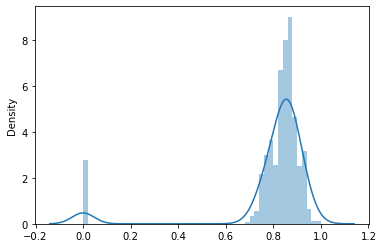

In [171]:
sns.distplot(preprocessing.minmax_scale(np.log(df.GarageArea)))

In [172]:
df["GarageArea"]=preprocessing.minmax_scale(np.log(df.GarageArea))
df_test["GarageArea"]=preprocessing.minmax_scale(np.log(df_test.GarageArea))

In [173]:
df["GarageQual"].fillna(df.GarageQual.mode()[0], inplace=True)
df_test["GarageQual"].fillna(df_test.GarageQual.mode()[0], inplace=True)

In [174]:
df.GarageQual.value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [175]:
def garage_qual_transform(text):
    
    if text=='Ex':
        return 4
    
    elif text=='Gd':
        return 3
    
    if text=='TA':
        return 2
    
    elif text=='Fa':
        return 1
    
    else:
        return 0
    
df['GarageQual'] = df['GarageQual'].apply(lambda x:garage_qual_transform(x))
df_test['GarageQual'] = df_test['GarageQual'].apply(lambda x:garage_qual_transform(x))

In [176]:
df["GarageCond"].fillna(df.GarageCond.mode()[0], inplace=True)
df_test["GarageCond"].fillna(df_test.GarageCond.mode()[0], inplace=True)

df['GarageCond'] = df['GarageCond'].apply(lambda x:garage_qual_transform(x))
df_test['GarageCond'] = df_test['GarageCond'].apply(lambda x:garage_qual_transform(x))

### PavedDrive

In [177]:
df = pd.get_dummies(df, columns = ["PavedDrive"])
df_test = pd.get_dummies(df_test, columns = ["PavedDrive"])

### Wood

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

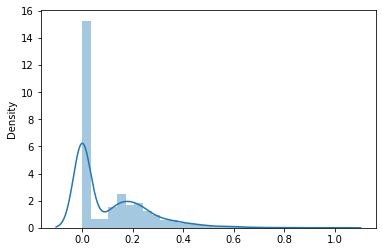

In [178]:
sns.distplot(preprocessing.minmax_scale(df.WoodDeckSF))

In [179]:
df["WoodDeckSF"]=preprocessing.minmax_scale(df.WoodDeckSF)
df_test["WoodDeckSF"]=preprocessing.minmax_scale(df_test.WoodDeckSF)

### porchs

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

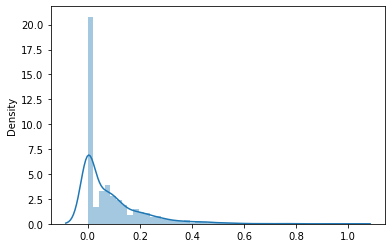

In [180]:
sns.distplot(preprocessing.minmax_scale(df.OpenPorchSF))

In [181]:
df["OpenPorchSF"]=preprocessing.minmax_scale(df.OpenPorchSF)
df_test["OpenPorchSF"]=preprocessing.minmax_scale(df_test.OpenPorchSF)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

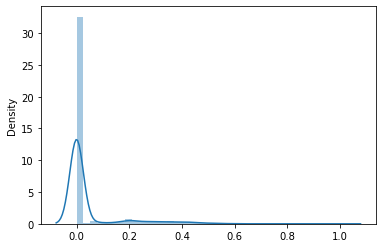

In [182]:
sns.distplot(preprocessing.minmax_scale(df.EnclosedPorch))

In [183]:
df["EnclosedPorch"]=preprocessing.minmax_scale(df.EnclosedPorch)
df_test["EnclosedPorch"]=preprocessing.minmax_scale(df_test.EnclosedPorch)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

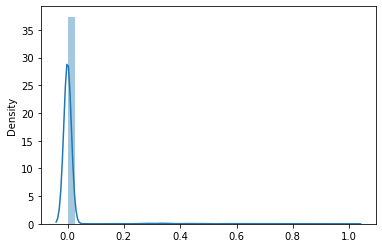

In [184]:
sns.distplot(preprocessing.minmax_scale(df["3SsnPorch"]))

In [185]:
df["3SsnPorch"]=preprocessing.minmax_scale(df["3SsnPorch"])
df_test["3SsnPorch"]=preprocessing.minmax_scale(df_test["3SsnPorch"])

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

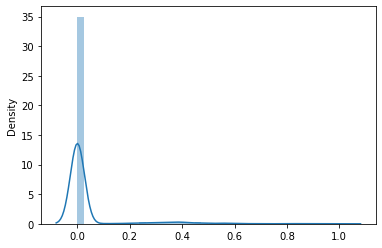

In [186]:
sns.distplot(preprocessing.minmax_scale(df["ScreenPorch"]))

In [187]:
df["ScreenPorch"]=preprocessing.minmax_scale(df["ScreenPorch"])
df_test["ScreenPorch"]=preprocessing.minmax_scale(df_test["ScreenPorch"])

### pool

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

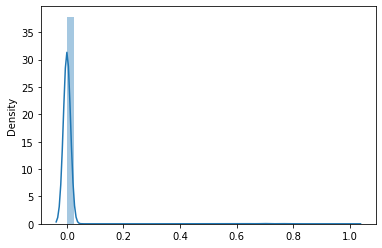

In [188]:
sns.distplot(preprocessing.minmax_scale(df["PoolArea"]))

In [189]:
df["PoolArea"]=preprocessing.minmax_scale(df["PoolArea"])
df_test["PoolArea"]=preprocessing.minmax_scale(df_test["PoolArea"])

In [190]:
df_test['PoolQC'] = df_test['PoolQC'].fillna('No Pool')
df['PoolQC'] = df['PoolQC'].fillna('No Pool')

In [191]:
def pool_qual_transform(text):
    
    if text=='Ex':
        return 4
    
    elif text=='Gd':
        return 3
    
    if text=='TA':
        return 2
    
    elif text=='Fa':
        return 1
    
    else:
        return 0
    
df['PoolQC'] = df['PoolQC'].apply(lambda x:pool_qual_transform(x))
df_test['PoolQC'] = df_test['PoolQC'].apply(lambda x:pool_qual_transform(x))

### Fence

In [192]:
df_test['Fence'] = df_test['Fence'].fillna('No Fence')
df['Fence'] = df['Fence'].fillna('No Fence')

In [193]:
def fence_transform(text):
    
    if text=='GdPrv':
        return 4
    
    elif text=='MnPrv':
        return 3
    
    if text=='GdWo':
        return 2
    
    elif text=='MnWw':
        return 1
    
    else:
        return 0
    
df['Fence'] = df['Fence'].apply(lambda x:fence_transform(x))
df_test['Fence'] = df_test['Fence'].apply(lambda x:fence_transform(x))

### Misc

In [194]:
df_test['MiscFeature'] = df_test['MiscFeature'].fillna('No')
df['MiscFeature'] = df['MiscFeature'].fillna('No')

In [195]:
df.MiscFeature.value_counts()

No      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [196]:
mapping_misc = {'Gar2': 'Shed', 'Othr': 'Shed', 'TenC': 'Shed'}

df['MiscFeature'] = df['MiscFeature'].replace(mapping_misc)
df_test['MiscFeature'] = df_test['MiscFeature'].replace(mapping_misc)

df = pd.get_dummies(df, columns = ["MiscFeature"])
df_test = pd.get_dummies(df_test, columns = ["MiscFeature"])

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

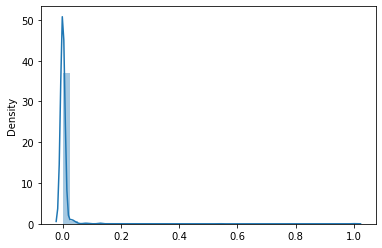

In [197]:
sns.distplot(preprocessing.minmax_scale(df.MiscVal))

In [198]:
df["MiscVal"]=preprocessing.minmax_scale(df.MiscVal)

In [199]:
df

,MSZoning,LotFrontage,LotArea,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,MSSubClass_1 kat,MSSubClass_1.5 kat,MSSubClass_2 aile,MSSubClass_2 kat,MSSubClass_PUD,MSSubClass_multilevel,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_have not,LotShape_IR,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Other,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_IDOTRR,Neighborhood_Somerst,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SLvl,Age,Age2,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Other,RoofMatl_CompShg,RoofMatl_Other,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CemntBd,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Heating_GasA,Heating_GasW,Heating_Other,Electrical_FuseA,Electrical_FuseF,Electrical_SBrkr,Functional_Maj1,Functional_Min2,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_No,MiscFeature_Shed
0,1,0.275973,0.348130,1,0,7,5,1,3,2,4,3,1,6,0.759360,1,0.000000,0.646017,0.774549,4,1,0.356155,0.884322,0.577712,1,0,2,1,0.375,0.333333,3,0.500000,0,0,0.938013,0.50,0.868992,2,2,0.000000,0.111517,0.000000,0.0,0.0,0.0,0,0,0.00000,WD,Normal,208500,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.036765,0.098361,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0
1,1,0.346603,0.372603,1,0,6,8,0,2,2,4,3,4,5,0.797086,1,0.000000,0.728318,0.819077,4,1,0.503056,0.000000,0.470245,0,1,2,0,0.375,0.333333,2,0.333333,1,2,0.696875,0.50,0.844870,2,2,0.347725,0.000000,0.000000,0.0,0.0,0.0,0,0,0.00000,WD,Normal,181500,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.227941,0.524590,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0
2,1,0.290742,0.403159,1,0,7,5,1,3,2,4,3,2,6,0.716133,1,0.000000,0.782993,0.782820,4,1,0.383441,0.886150,0.593095,1,0,2,1,0.375,0.333333,3,0.333333,1,2,0.920263,0.50,0.883309,2,2,0.000000,0.076782,0.000000,0.0,0.0,0.0,0,0,0.00000,WD,Normal,223500,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.051471,0.114754,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0
3,1,0.250545,0.371600,1,0,7,5,0,2,2,3,4,1,5,0.622258,1,0.000000,0.811167,0.760299,3,1,0.399941,0.868353,0.579157,1,0,1,0,0.375,0.333333,3,0.416667,1,3,0.893604,0.75,0.890807,2,2,0.000000,0.063985,0.492754,0.0,0.0,0.0,0,0,0.00000,WD,Abnorml,140000,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.669118,0.606557,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0
4,1,0.364203,0.449116,1,0,8,5,2,3,2,4,3,3,6,0.750680,1,0.000000,0.798640,0.807917,4,1,0.466237,0.911765,0.666523,1,0,2,1,0.500,0.333333,3,0.583333,1,2,0.911381,0.75,0.927191,2,2,0.224037,0.153565,0.000000,0.0,0.0,0.0,0,0,0.00000,WD,Normal,250000,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.058824,0.147541,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0
...,...,...

### SaleType

In [200]:
df_test["SaleType"].fillna(df.SaleType.mode()[0], inplace=True)

In [201]:
df.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [202]:
mapping_stype = {'CWD': 'WD', 'ConLw': 'Con', 'ConLI': 'Con','ConLD': 'Con','Oth': 'WD'}

df['SaleType'] = df['SaleType'].replace(mapping_stype)
df_test['SaleType'] = df_test['SaleType'].replace(mapping_stype)

In [203]:
df = pd.get_dummies(df, columns = ["SaleType"])
df_test = pd.get_dummies(df_test, columns = ["SaleType"])

### Sale condition

In [204]:
df.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [205]:
mapping_scond = {'AdjLand': 'Alloca'}

df['SaleCondition'] = df['SaleCondition'].replace(mapping_scond)
df_test['SaleCondition'] = df_test['SaleCondition'].replace(mapping_scond)

df = pd.get_dummies(df, columns = ["SaleCondition"])
df_test = pd.get_dummies(df_test, columns = ["SaleCondition"])

### Sale Price

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

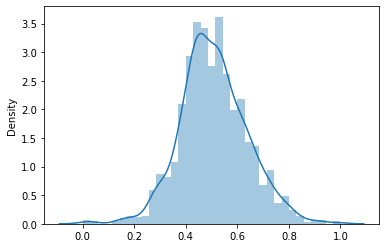

In [206]:
sns.distplot(preprocessing.minmax_scale(np.log(df.SalePrice)))

In [207]:
Saleprice_min=df.SalePrice.min()
Saleprice_max=df.SalePrice.max()

In [208]:
df["SalePrice"]=preprocessing.minmax_scale(np.log(df.SalePrice))

In [209]:
corr_matrix = df.corr()



# 0.7 veya daha büyük olan korelasyon katsayılarını bul
high_corr = np.where(np.abs(corr_matrix) >= 0.7)

# tekrar eden çiftleri kaldır
high_corr = [(corr_matrix.iloc[i, j], corr_matrix.columns[i], corr_matrix.columns[j])
             for i, j in zip(*high_corr) if i != j and i < j]

# korelasyon katsayılarına göre sırala
high_corr.sort(reverse=True)

# sonuçları ekrana yazdır
for correlation, feature1, feature2 in high_corr:
    print(f"{feature1} - {feature2}: {correlation}")

SaleType_New - SaleCondition_Partial: 0.9868189596845142
MSSubClass_2 aile - BldgType_2fmCon: 0.9833947289220359
Exterior1st_VinylSd - Exterior2nd_VinylSd: 0.9790182988128361
Exterior1st_MetalSd - Exterior2nd_MetalSd: 0.9017572931819505
PoolArea - PoolQC: 0.899923763605976
MSSubClass_1.5 kat - HouseStyle_1.5Fin: 0.8989733670175187
Exterior1st_HdBoard - Exterior2nd_HdBoard: 0.883271397030471
BsmtFinType2 - BsmtFinSF2: 0.8823759244141004
Exterior1st_Wd Sdng - Exterior2nd_Wd Sdng: 0.8592439328330361
BsmtFinType1 - BsmtFinSF1: 0.850021580845669
MSSubClass_1 kat - HouseStyle_1Story: 0.8394836999549493
MSSubClass_2 kat - HouseStyle_2Story: 0.829981700653681
MSSubClass_PUD - BldgType_TwnhsE: 0.829548114514285
Fireplaces - FireplaceQu: 0.829462584273353
GrLivArea - TotRmsAbvGrd: 0.8254979554657593
OverallQual - SalePrice: 0.8171844179216855
2ndFlrSF - HouseStyle_2Story: 0.7809491094315905
MSSubClass_multilevel - HouseStyle_SLvl: 0.744526916847203
Exterior1st_CemntBd - Exterior2nd_CmentBd: 0.73

In [210]:
df_without_saleprice = df.drop(columns=['SalePrice'], axis=1)
# korelasyon matrisini oluşturalım
corr_matrix = df_without_saleprice.corr().abs()

# üst üçgeni alalım ve yüksek korelasyona sahip olan değişkenleri içeren bir liste oluşturalım
high_corr_vars = np.where(corr_matrix > 0.7)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) for x, y in zip(*high_corr_vars) if x < y]

# her bir değişkenin sadece bir kez yer aldığı bir şekilde yazdıralım
unique_vars = set()
for pair in high_corr_pairs:
    if pair[0] not in unique_vars and pair[1] not in unique_vars:
        print(f"{pair[0]} ve {pair[1]} arasında yüksek korelasyon: {pair[2]}")
        unique_vars.add(pair[0])
        unique_vars.add(pair[1])
        df.drop(columns=pair[1], inplace=True)
        df_test.drop(columns=pair[1], inplace=True)

OverallQual ve ExterQual arasında yüksek korelasyon: 0.7262784907641405
MasVnrArea ve MasVnrType_None arasında yüksek korelasyon: 0.8257066720046778
BsmtQual ve Age arasında yüksek korelasyon: 0.7237720768593577
BsmtFinType1 ve BsmtFinSF1 arasında yüksek korelasyon: 0.850021580845669
BsmtFinType2 ve BsmtFinSF2 arasında yüksek korelasyon: 0.8823759244141004
2ndFlrSF ve MSSubClass_1 kat arasında yüksek korelasyon: 0.7283852082928535
GrLivArea ve TotRmsAbvGrd arasında yüksek korelasyon: 0.8254979554657593
Fireplaces ve FireplaceQu arasında yüksek korelasyon: 0.829462584273353
GarageCars ve GarageArea arasında yüksek korelasyon: 0.7304590549945172
PoolArea ve PoolQC arasında yüksek korelasyon: 0.899923763605976
MSSubClass_1.5 kat ve HouseStyle_1.5Fin arasında yüksek korelasyon: 0.8989733670175187
MSSubClass_2 aile ve BldgType_2fmCon arasında yüksek korelasyon: 0.9833947289220359
MSSubClass_2 kat ve HouseStyle_2Story arasında yüksek korelasyon: 0.829981700653681
MSSubClass_PUD ve BldgType_1

In [211]:
df

,MSZoning,LotFrontage,LotArea,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageYrBlt,GarageCars,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SalePrice,MSSubClass_1.5 kat,MSSubClass_2 aile,MSSubClass_2 kat,MSSubClass_PUD,MSSubClass_multilevel,Street_Grvl,Alley_Grvl,Alley_Pave,LotShape_IR,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_IDOTRR,Neighborhood_Somerst,Neighborhood_Veenker,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,Age2,RoofStyle_Gable,RoofStyle_Other,RoofMatl_CompShg,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CemntBd,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_Slab,Heating_GasA,Heating_Other,Electrical_FuseA,Electrical_FuseF,Functional_Maj1,Functional_Min2,GarageType_Attchd,GarageType_BuiltIn,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,MiscFeature_No,SaleType_COD,SaleType_Con,SaleType_New,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.275973,0.348130,1,0,7,5,1,2,4,3,1,6,1,0.646017,0.774549,4,1,0.356155,0.884322,0.577712,1,0,2,1,0.375,0.333333,3,0,0.938013,0.50,2,2,0.000000,0.111517,0.000000,0.0,0.0,0.0,0,0.00000,0.581431,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.098361,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,1,0.346603,0.372603,1,0,6,8,0,2,4,3,4,5,1,0.728318,0.819077,4,1,0.503056,0.000000,0.470245,0,1,2,0,0.375,0.333333,2,1,0.696875,0.50,2,2,0.347725,0.000000,0.000000,0.0,0.0,0.0,0,0.00000,0.536319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.524590,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0.290742,0.403159,1,0,7,5,1,2,4,3,2,6,1,0.782993,0.782820,4,1,0.383441,0.886150,0.593095,1,0,2,1,0.375,0.333333,3,1,0.920263,0.50,2,2,0.000000,0.076782,0.000000,0.0,0.0,0.0,0,0.00000,0.604029,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.114754,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,1,0.250545,0.371600,1,0,7,5,0,2,3,4,1,5,1,0.811167,0.760299,3,1,0.399941,0.868353,0.579157,1,0,1,0,0.375,0.333333,3,1,0.893604,0.75,2,2,0.000000,0.063985,0.492754,0.0,0.0,0.0,0,0.00000,0.451871,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.606557,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,1,0.364203,0.449116,1,0,8,5,2,2,4,3,3,6,1,0.798640,0.807917,4,1,0.466237,0.911765,0.666523,1,0,2,1,0.500,0.333333,3,1,0.911381,0.75,2,2,0.224037,0.153565,0.000000,0.0,0.0,0.0,0,0.00000,0.640477,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.147541,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0.260843,0.335670,1,0,6,5,0,2,4,3,1,1,1,0.884405,0.786862,4,1,0.396777,0.857143,0.564433,0,0,2,1,0.375,0.333333,2,1,0.902495,0.50,2,2,0.000000,0.073126,0.000000,0.0,0.0,0.0,0,0.00000,0.524456,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.131148,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1456,1,0.368531,0.433739,1,0,6,6,1,2,4,3,1,5,3,0.822365,0.842063,2,1,0.690872,0.000000,0.645810,1,0,2,0,0.375,0.333333,2,2,0.7148

In [212]:
from pycaret.regression import *

In [213]:
reg_model = setup(df, target = 'SalePrice', session_id = 123)

# en iyi modeli seçmek için model karşılaştırması yapalım
models = compare_models()

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 103)"
4,Transformed data shape,"(1460, 103)"
5,Transformed train set shape,"(1021, 103)"
6,Transformed test set shape,"(439, 103)"
7,Numeric features,102
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0284,0.0018,0.0422,0.8974,0.0291,0.1142,0.1390
gbr,Gradient Boosting Regressor,0.0311,0.0020,0.0439,0.8890,0.0303,0.1072,0.1150
lightgbm,Light Gradient Boosting Machine,0.0318,0.0021,0.0459,0.8788,0.0319,0.1356,0.1710
huber,Huber Regressor,0.0311,0.0023,0.0468,0.8711,0.0318,0.1093,0.1090
et,Extra Trees Regressor,0.0333,0.0023,0.0478,0.8685,0.0330,0.1441,0.1240
xgboost,Extreme Gradient Boosting,0.0335,0.0023,0.0479,0.8667,0.0333,0.1362,0.1200
br,Bayesian Ridge,0.0322,0.0024,0.0478,0.8667,0.0323,0.1105,0.1280
ridge,Ridge Regression,0.0319,0.0024,0.0478,0.8663,0.0322,0.1078,0.1170
rf,Random Forest Regressor,0.0336,0.0025,0.0489,0.8617,0.0338,0.1373,0.1230
lr,Linear Regression,0.0323,0.0025,0.0486,0.8615,0.0328,0.1067,0.5590


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [214]:
best_model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0320,0.0028,0.0532,0.8616,0.0365,0.1096
1,0.0259,0.0014,0.0375,0.9038,0.0261,0.0583
2,0.0245,0.0013,0.0362,0.9146,0.0254,0.0590
3,0.0281,0.0015,0.0381,0.9023,0.0261,0.0655
4,0.0321,0.0026,0.0507,0.8931,0.0356,0.1112
5,0.0279,0.0018,0.0424,0.8930,0.0301,0.4973
6,0.0279,0.0012,0.0350,0.9187,0.0236,0.0609
7,0.0290,0.0019,0.0434,0.8991,0.0322,0.0571
8,0.0320,0.0027,0.0524,0.8609,0.0337,0.0725


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [215]:
tuned_model = tune_model(best_model)

# optimize edilmiş modeli inceleyelim
print(tuned_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0341,0.0030,0.0544,0.8556,0.0376,0.1170
1,0.0295,0.0017,0.0412,0.8838,0.0278,0.0632
2,0.0281,0.0016,0.0394,0.8992,0.0277,0.0678
3,0.0316,0.0018,0.0425,0.8782,0.0289,0.0725
4,0.0386,0.0033,0.0574,0.8633,0.0403,0.1283
5,0.0307,0.0020,0.0447,0.8808,0.0321,0.5649
6,0.0304,0.0015,0.0382,0.9033,0.0258,0.0669
7,0.0314,0.0019,0.0433,0.8997,0.0317,0.0630
8,0.0335,0.0026,0.0512,0.8671,0.0336,0.0768


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


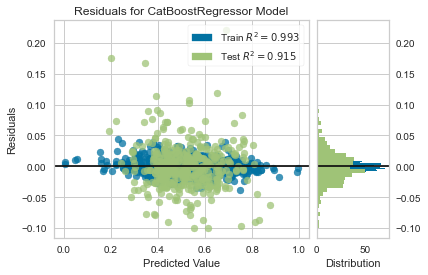

In [216]:
plot_model(tuned_model, plot='residuals')

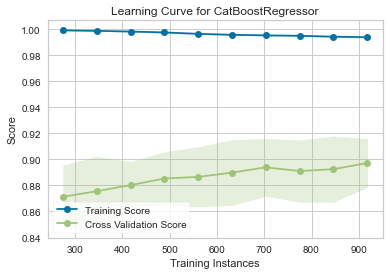

In [217]:
plot_model(tuned_model, plot='learning')

## Catboost

### Default

In [218]:
x=df.drop(columns=['SalePrice'])
y=df.SalePrice

In [219]:
from sklearn.model_selection import train_test_split

# Verileri eğitim ve test setlerine ayır
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)

In [220]:
from catboost import CatBoostRegressor

In [221]:
model_default = CatBoostRegressor(verbose=False)

# modeli eğit
model_default.fit(x_train, y_train)

In [222]:
from sklearn.metrics import r2_score

train_pred = model_default.predict(x_train)
train_r2 = r2_score(y_train, train_pred)

test_pred = model_default.predict(x_test)
test_r2 = r2_score(y_test, test_pred)




print(f'Train R^2: {train_r2:.4f}')
print(f'Test R^2: {test_r2:.4f}',"\n")





from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(y_test, test_pred)
mae_train = mean_absolute_error(y_train, train_pred)
mse = mean_squared_error(y_test, test_pred)
mse_train = mean_squared_error(y_train, train_pred)
rmse = np.sqrt(mse)
rmse_train = np.sqrt(mse_train)

mae = (mae * (Saleprice_max - Saleprice_min)) + Saleprice_min
mae_train = (mae_train * (Saleprice_max - Saleprice_min)) + Saleprice_min
mse = (mse * (Saleprice_max - Saleprice_min)) + Saleprice_min
mse_train = (mse_train * (Saleprice_max - Saleprice_min)) + Saleprice_min
rmse = (rmse * (Saleprice_max - Saleprice_min)) + Saleprice_min
rmse_train = (rmse_train * (Saleprice_max - Saleprice_min)) + Saleprice_min

print("MAE:", mae)
print("MAE_train:", mae_train)
print("\nMSE:", mse)
print("MSE train:", mse_train)
print("\nRMSE:", rmse)
print("RMSE_train:", rmse_train)

Train R^2: 0.9924
Test R^2: 0.8964 

MAE: 53189.56518298845
MAE_train: 41287.21042574783

MSE: 36028.44767299585
MSE train: 34996.90380215852

RMSE: 63406.05495897858
RMSE_train: 43253.468018395164


In [223]:
predicts = (model_default.predict(df_test.drop('Id')) * (Saleprice_max - Saleprice_min)) + Saleprice_min
predicts

array([305876.02817642, 397007.00358309, 414760.13513624, ...,
       369800.2828967 , 325103.30777861, 462425.09497481])

In [224]:
df_test["SalePrice"]=predicts

In [225]:
submission=df_test[["Id","SalePrice"]]

In [226]:
submission.to_csv('submission.csv', index=False)

### EarlyStopping

In [259]:
model = CatBoostRegressor(loss_function='RMSE', early_stopping_rounds=5, random_seed=3)

# modeli eğit
model.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [261]:
train_pred = model.predict(x_train)
train_r2 = r2_score(y_train, train_pred)

# Test seti için R^2 skoru hesapla
test_pred = model.predict(x_test)
test_r2 = r2_score(y_test, test_pred)


print(f'Train R^2: {train_r2:.4f}')
print(f'Test R^2: {test_r2:.4f}')


mae = mean_absolute_error(y_test, test_pred)
mae_train = mean_absolute_error(y_train, train_pred)
mse = mean_squared_error(y_test, test_pred)
mse_train = mean_squared_error(y_train, train_pred)
rmse = np.sqrt(mse)
rmse_train = np.sqrt(mse_train)



mae = (mae * (Saleprice_max - Saleprice_min)) + Saleprice_min
mae_train = (mae_train * (Saleprice_max - Saleprice_min)) + Saleprice_min
mse = (mse * (Saleprice_max - Saleprice_min)) + Saleprice_min
mse_train = (mse_train * (Saleprice_max - Saleprice_min)) + Saleprice_min
rmse = (rmse * (Saleprice_max - Saleprice_min)) + Saleprice_min
rmse_train = (rmse_train * (Saleprice_max - Saleprice_min)) + Saleprice_min

print("MAE:", mae)
print("MAE_train:", mae_train)
print("\nMSE:", mse)
print("MSE train:", mse_train)
print("\nRMSE:", rmse)
print("RMSE_train:", rmse_train)

MAE: 53618.98441399393
MAE_train: 51156.14176374151

MSE: 35947.37761186565
MSE train: 35582.24487341472

RMSE: 62363.00453891483
RMSE_train: 57064.93928135009


In [262]:
predicts_2 = (model.predict(df_test.drop(columns=['Id','SalePrice'])) * (Saleprice_max - Saleprice_min)) + Saleprice_min
predicts_2

array([308232.72176355, 389162.49414241, 410628.3763608 , ...,
       361700.23577966, 326963.7559434 , 457401.30007204])

In [265]:
df_test["SalePrice"]=predicts_2
submission=df_test[["Id","SalePrice"]]
submission.to_csv('submission_earlystopp_cb.csv', index=False)

### pycaret

In [270]:
predicts_3 = (best_model.predict(df_test.drop(columns=['Id','SalePrice'])) * (Saleprice_max - Saleprice_min)) + Saleprice_min
predicts_3

array([316531.18145265, 395062.73698731, 416786.81027843, ...,
       382351.50895137, 325623.99706837, 458994.83980636])

In [271]:
df_test["SalePrice"]=predicts_3
submission=df_test[["Id","SalePrice"]]
submission.to_csv('submission_pycaretdefault.csv', index=False)

In [273]:
predicts_4 = (tuned_model.predict(df_test.drop(columns=['Id','SalePrice'])) * (Saleprice_max - Saleprice_min)) + Saleprice_min
predicts_4

array([316531.18145265, 395062.73698731, 416786.81027843, ...,
       382351.50895137, 325623.99706837, 458994.83980636])

In [274]:
df_test["SalePrice"]=predicts_4
submission=df_test[["Id","SalePrice"]]
submission.to_csv('submission_pycarettuned.csv', index=False)

In [275]:
predicts_3.sum()

564530214.1404608

In [276]:
predicts_4.sum()

564530214.1404608

In [278]:
train_pred = best_model.predict(x_train)
train_r2 = r2_score(y_train, train_pred)

# Test seti için R^2 skoru hesapla
test_pred = best_model.predict(x_test)
test_r2 = r2_score(y_test, test_pred)


print(f'Train R^2: {train_r2:.4f}')
print(f'Test R^2: {test_r2:.4f}')


mae = mean_absolute_error(y_test, test_pred)
mae_train = mean_absolute_error(y_train, train_pred)
mse = mean_squared_error(y_test, test_pred)
mse_train = mean_squared_error(y_train, train_pred)
rmse = np.sqrt(mse)
rmse_train = np.sqrt(mse_train)



mae = (mae * (Saleprice_max - Saleprice_min)) + Saleprice_min
mae_train = (mae_train * (Saleprice_max - Saleprice_min)) + Saleprice_min
mse = (mse * (Saleprice_max - Saleprice_min)) + Saleprice_min
mse_train = (mse_train * (Saleprice_max - Saleprice_min)) + Saleprice_min
rmse = (rmse * (Saleprice_max - Saleprice_min)) + Saleprice_min
rmse_train = (rmse_train * (Saleprice_max - Saleprice_min)) + Saleprice_min

print("MAE:", mae)
print("MAE_train:", mae_train)
print("\nMSE:", mse)
print("MSE train:", mse_train)
print("\nRMSE:", rmse)
print("RMSE_train:", rmse_train)

Train R^2: 0.9693
Test R^2: 0.9784
MAE: 44031.23145396684
MAE_train: 44848.52619375584

MSE: 35135.17729602468
MSE train: 35292.017866397786

RMSE: 47913.49956266074
RMSE_train: 51701.54949976477


In [279]:
train_pred = tuned_model.predict(x_train)
train_r2 = r2_score(y_train, train_pred)

# Test seti için R^2 skoru hesapla
test_pred = tuned_model.predict(x_test)
test_r2 = r2_score(y_test, test_pred)


print(f'Train R^2: {train_r2:.4f}')
print(f'Test R^2: {test_r2:.4f}')


mae = mean_absolute_error(y_test, test_pred)
mae_train = mean_absolute_error(y_train, train_pred)
mse = mean_squared_error(y_test, test_pred)
mse_train = mean_squared_error(y_train, train_pred)
rmse = np.sqrt(mse)
rmse_train = np.sqrt(mse_train)



mae = (mae * (Saleprice_max - Saleprice_min)) + Saleprice_min
mae_train = (mae_train * (Saleprice_max - Saleprice_min)) + Saleprice_min
mse = (mse * (Saleprice_max - Saleprice_min)) + Saleprice_min
mse_train = (mse_train * (Saleprice_max - Saleprice_min)) + Saleprice_min
rmse = (rmse * (Saleprice_max - Saleprice_min)) + Saleprice_min
rmse_train = (rmse_train * (Saleprice_max - Saleprice_min)) + Saleprice_min

print("MAE:", mae)
print("MAE_train:", mae_train)
print("\nMSE:", mse)
print("MSE train:", mse_train)
print("\nRMSE:", rmse)
print("RMSE_train:", rmse_train)

Train R^2: 0.9693
Test R^2: 0.9784
MAE: 44031.23145396684
MAE_train: 44848.52619375584

MSE: 35135.17729602468
MSE train: 35292.017866397786

RMSE: 47913.49956266074
RMSE_train: 51701.54949976477
